In [4]:
# ============================================================
# Load and Clean the dataset
# ============================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from cleaning import load_and_clean_data
df_clean = load_and_clean_data()

In [5]:
from prediction import (
    prepare_model_data,
    split_data,
    fit_linear_regression,
    evaluate_model,
    coefficients_table,
    plot_actual_vs_predicted
)

In [6]:
# ============================================================
# Step 16: Split data to train and test sets
# ============================================================

X, y, numeric_cols, amenity_cols = prepare_model_data(df_clean)

X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

print("Train rows:", len(X_train))
print("Test rows:", len(X_test))

Train rows: 392
Test rows: 98


In [7]:
# ============================================================
# Step 17: Fit a Linear Regression model (scikit-learn)
# ============================================================

model, scaler = fit_linear_regression(X_train, y_train, numeric_cols)
print("Model fitted.")

Model fitted.


In [8]:
# ============================================================
# Step 18: Check R-squared and MSE
# ============================================================

r2, mse, y_pred = evaluate_model(model, scaler, X_test, y_test, numeric_cols)

print("R-squared (R²):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²): -0.0062937492676107265
Mean Squared Error (MSE): 0.8601275913929423


In [9]:
# ============================================================
# Step 19: Print model coefficients
# ============================================================

feature_names = list(X.columns)
coef_df = coefficients_table(model, feature_names)

display(coef_df)

,feature,coefficient
0,Free internet,0.993850
1,Pool,0.981986
2,Gym,0.297263
3,Hotel stars,0.184756
4,Tennis court,0.147143
5,Member years,0.064103
6,Casino,0.009401
7,Helpful votes,-0.002153
8,Nr. rooms,-0.009963
9,Spa,-0.203366


In [11]:
# ============================================================
# Step 20: Report the R² score
# ============================================================

print("The model explains about", round(r2 * 100, 2), "% of the variance in Score.")

The model explains about -0.63 % of the variance in Score.


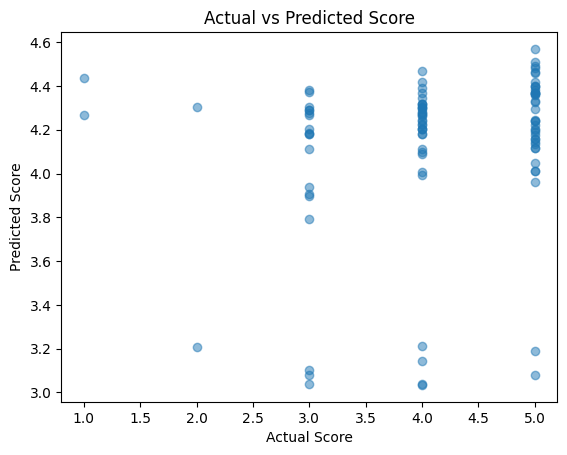

In [12]:
# ============================================================
# Step 21 (Optional): Scatter plot of actual vs predicted Score
# ============================================================

plot_actual_vs_predicted(y_test, y_pred)